<center><h1>Verbal Autopsy Clustering</h1></center>


<h1>Presentacion y datos</h1>

<h1>Bibliografia de momento</h1>

https://www.analyticsvidhya.com/blog/2021/06/must-known-techniques-for-text-preprocessing-in-nlp/

https://www.researchgate.net/publication/339529230_Preprocessing_Techniques_for_Text_Mining_-_An_Overview
***

Primero vamos a importar todo lo necesario para llevar a cabo la tarea de clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
import nltk
from nltk.corpus import stopwords
import contractions
from nltk.stem import WordNetLemmatizer
import re
from nltk.stem import PorterStemmer
import seaborn as sb

Antes de empezar debemos crear un objeto a partir del archivo .csv que hemos escogido.

In [2]:
data = pd.read_csv("data/cleaned_PHMRC_VAI_redacted_free_text.train.csv")

Una vez creado aqui tenemos un pequeño ejemplo de lo que esta compuesto.

In [3]:
data.tail(5)

,newid,module,age,sex,site,open_response,gs_text34
5204,7120,Adult,42.0,1,UP,the deceased fell ill in the morning his breat...,Diabetes
5205,6101,Adult,14.0,2,Pemba,the respondant expained that the decease death...,Other Infectious Diseases
5206,6455,Adult,80.0,2,UP,the deceased had been admitted to hospital whe...,Pneumonia
5207,5026,Adult,70.0,1,UP,the deceased had been suffering from breathing...,Other Cardiovascular Diseases
5208,5326,Adult,30.0,1,Dar,the deceased died because of being hitted by a...,Other Injuries


Primero valoraremos si alguna de las instancias tiene algun valor null.

In [4]:
data_null = data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5209 entries, 0 to 5208
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   newid          5209 non-null   int64  
 1   module         5209 non-null   object 
 2   age            5209 non-null   float64
 3   sex            5209 non-null   int64  
 4   site           5209 non-null   object 
 5   open_response  5209 non-null   object 
 6   gs_text34      5209 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 285.0+ KB


No se aprecia ninguna entidad con valor null.

<h3>Representación gráfica</h3>

<BarContainer object of 48 artists>

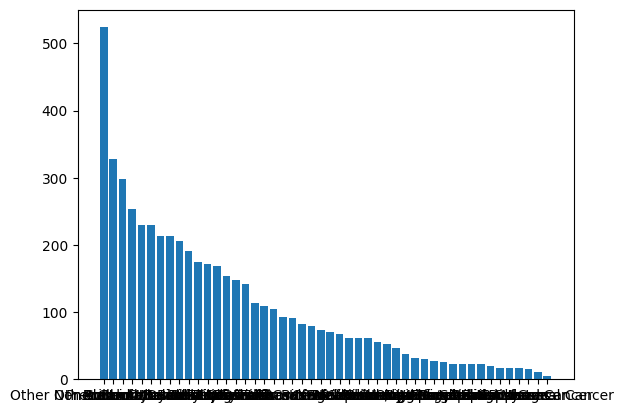

In [5]:
gs_text34 = data['gs_text34'].copy()
#plt.rcParams['figure.figsize'] = [40, 5]
plt.bar(gs_text34.value_counts().index, gs_text34.value_counts())

Al haber 48 tipos de muertes en el archivo .csv no se llega a apreciar bien la informacion. Por lo tanto vamos a hacer grafico mas pequeño para poder entenderlo mejor

<BarContainer object of 10 artists>

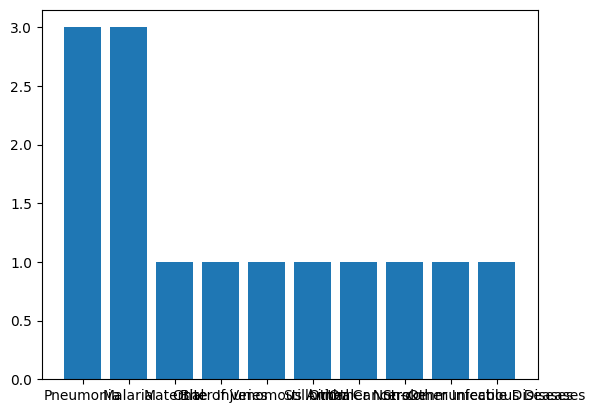

In [6]:
little_gs_text34 = gs_text34[0:14]
plt.bar(little_gs_text34.value_counts().index, little_gs_text34.value_counts())

Seleccionando solamente las 15 primera instancias del archivo .csv podemos apreciar que han habido 10 tipos diferentes de muerte y que solo dos de ellas se han repetido, en este caso 3 veces; Pneumonia y Malaria. 

<h3>Ver clases presentes y cadencia de cada una</h3>

In [7]:
print(data.groupby('gs_text34').size())

gs_text34
AIDS                                    154
Acute Myocardial Infarction             206
Asthma                                   17
Birth asphyxia                          171
Bite of Venomous Animal                  61
Breast Cancer                            62
COPD                                     80
Cervical Cancer                          22
Cirrhosis                               142
Colorectal Cancer                        37
Congenital malformation                  92
Diabetes                                174
Diarrhea/Dysentery                      229
Drowning                                 91
Encephalitis                             23
Epilepsy                                 20
Esophageal Cancer                         5
Falls                                   114
Fires                                   104
Hemorrhagic fever                        22
Homicide                                 74
Leukemia/Lymphomas                       46
Lung Cancer           

(Explicacion de que hay muchos tipos de conjuntos y vamos a agruparla en grupos mas grandes segun 'VA_ConsistentRelabelling.txt')

<h3>Agrupar clases en grupos amas grandes</h3>

In [8]:
for i in range(len(data)):
    if data['gs_text34'][i] == 'TB':
        data['gs_text34'][i] = 'Certain infectious and Parasitic Diseases'  
    if data['gs_text34'][i] == 'Diarrhea/Dysentery':
        data['gs_text34'][i] = 'Certain infectious and Parasitic Diseases'
    if data['gs_text34'][i] == 'Other infectious diseases':
        data['gs_text34'][i] = 'Certain infectious and Parasitic Diseases'
    if data['gs_text34'][i] == 'AIDS':
        data['gs_text34'][i] = 'Certain infectious and Parasitic Diseases'
    if data['gs_text34'][i] == 'Sepsis':
        data['gs_text34'][i] = 'Certain infectious and Parasitic Diseases'
    if data['gs_text34'][i] == 'Meningitis':
        data['gs_text34'][i] = 'Certain infectious and Parasitic Diseases'
    if data['gs_text34'][i] == 'Meningitis/Sepsis':
        data['gs_text34'][i] = 'Certain infectious and Parasitic Diseases'
    if data['gs_text34'][i] == 'Malaria':
        data['gs_text34'][i] = 'Certain infectious and Parasitic Diseases'
    if data['gs_text34'][i] == 'Encephalitis':
        data['gs_text34'][i] = 'Certain infectious and Parasitic Diseases'
    if data['gs_text34'][i] == 'Measles':
        data['gs_text34'][i] = 'Certain infectious and Parasitic Diseases'
    if data['gs_text34'][i] == 'Hemorrhagic Fever':
        data['gs_text34'][i] = 'Certain infectious and Parasitic Diseases'
    if data['gs_text34'][i] == 'TB':
        data['gs_text34'][i] = 'Certain infectious and Parasitic Diseases'
    
    #----------------------------------------------------------------------------------
    
    if data['gs_text34'][i] == 'Leukemia/Lymphomas':
        data['gs_text34'][i] = 'Neoplasms'
    if data['gs_text34'][i] == 'Colorectal Cancer':
        data['gs_text34'][i] = 'Neoplasms'
    if data['gs_text34'][i] == 'Lung Cancer':
        data['gs_text34'][i] = 'Neoplasms'
    if data['gs_text34'][i] == 'Cervical Cancer':
        data['gs_text34'][i] = 'Neoplasms'
    if data['gs_text34'][i] == 'Breast Cancer':
        data['gs_text34'][i] = 'Neoplasms'
    if data['gs_text34'][i] == 'Stomach Cancer':
        data['gs_text34'][i] = 'Neoplasms'
    if data['gs_text34'][i] == 'Prostate Cancer':
        data['gs_text34'][i] = 'Neoplasms'
    if data['gs_text34'][i] == 'Esophageal Cancer':
        data['gs_text34'][i] = 'Neoplasms'
    if data['gs_text34'][i] == 'Other Cancers':
        data['gs_text34'][i] = 'Neoplasms'
        
    #----------------------------------------------------------------------------------

    if data['gs_text34'][i] == 'Diabetes':
        data['gs_text34'][i] = 'Endocrine, Nutritional and Metabolic Diseases'
    
    #----------------------------------------------------------------------------------

    if data['gs_text34'][i] == 'Epilepsy':
        data['gs_text34'][i] = 'Diseases of the Nervous System'
    
    #----------------------------------------------------------------------------------

    if data['gs_text34'][i] == 'Stroke':
        data['gs_text34'][i] = 'Diseases of the circulatory system'
    if data['gs_text34'][i] == 'Acute Myocardial Infarction':
        data['gs_text34'][i] = 'Diseases of the circulatory system'
    
    #----------------------------------------------------------------------------------
    
    if data['gs_text34'][i] == 'Pneumonia':
        data['gs_text34'][i] = 'Diseases of Respiratory System'
    if data['gs_text34'][i] == 'Asthma':
        data['gs_text34'][i] = 'Diseases of Respiratory System'
    if data['gs_text34'][i] == 'COPD':
        data['gs_text34'][i] = 'Diseases of Respiratory System'

    #----------------------------------------------------------------------------------

    if data['gs_text34'][i] == 'Cirrhosis':
        data['gs_text34'][i] = 'Diseases of the Digestive System'
    if data['gs_text34'][i] == 'Other Digestive Diseases':
        data['gs_text34'][i] = 'Diseases of the Digestive System'
    
    #----------------------------------------------------------------------------------

    if data['gs_text34'][i] == 'Renal Failure':
        data['gs_text34'][i] = 'Diseases of the Genitourinary System'
    
    #----------------------------------------------------------------------------------
    
    if data['gs_text34'][i] == 'Preterm Delivery':
        data['gs_text34'][i] = 'Pregnancy, childbirth and the puerperiu'
    if data['gs_text34'][i] == 'Stillbirth':
        data['gs_text34'][i] = 'Pregnancy, childbirth and the puerperiu'
    if data['gs_text34'][i] == 'Maternal':
        data['gs_text34'][i] = 'Pregnancy, childbirth and the puerperiu'
    if data['gs_text34'][i] == 'Birth Asphyxia':
        data['gs_text34'][i] = 'Pregnancy, childbirth and the puerperiu'
        
    #----------------------------------------------------------------------------------

    if data['gs_text34'][i] == 'Congenital Malformations':
        data['gs_text34'][i] = 'Congenital Malformations'
    
    #----------------------------------------------------------------------------------
    
    if data['gs_text34'][i] == 'Bite of Venomous Animal':
        data['gs_text34'][i] = 'Injury, Poisoning and External Causes'
    if data['gs_text34'][i] == 'Poisonings':
        data['gs_text34'][i] = 'Injury, Poisoning and External Causes'
        
    #----------------------------------------------------------------------------------
    
    if data['gs_text34'][i] == 'Road Traffic':
        data['gs_text34'][i] = 'External Causes of Morbidity and Mortality'
    if data['gs_text34'][i] == 'Falls':
        data['gs_text34'][i] = 'External Causes of Morbidity and Mortality'
    if data['gs_text34'][i] == 'Homicide':
        data['gs_text34'][i] = 'External Causes of Morbidity and Mortality'
    if data['gs_text34'][i] == 'Fires':
        data['gs_text34'][i] = 'External Causes of Morbidity and Mortality'
    if data['gs_text34'][i] == 'Drowning':
        data['gs_text34'][i] = 'External Causes of Morbidity and Mortality'
    if data['gs_text34'][i] == 'Suicide':
        data['gs_text34'][i] = 'External Causes of Morbidity and Mortality'
    if data['gs_text34'][i] == 'Violent Death':
        data['gs_text34'][i] = 'External Causes of Morbidity and Mortality'
    if data['gs_text34'][i] == 'Other Injuries':
        data['gs_text34'][i] = 'External Causes of Morbidity and Mortality'
    
print(data.groupby('gs_text34').size())

/tmp/ipykernel_5943/1287412024.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['gs_text34'][i] = 'Diseases of Respiratory System'
/tmp/ipykernel_5943/1287412024.py:93: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['gs_text34'][i] = 'Pregnancy, childbirth and the puerperiu'
/tmp/ipykernel_5943/1287412024.py:126: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['gs_text34'][i] = 'External Causes of Morbidity and Mortalit

gs_text34
Birth asphyxia                                   171
Certain infectious and Parasitic Diseases        716
Congenital malformation                           92
Diseases of Respiratory System                   621
Diseases of the Digestive System                 164
Diseases of the Genitourinary System             191
Diseases of the Nervous System                    20
Diseases of the circulatory system               504
Endocrine, Nutritional and Metabolic Diseases    174
External Causes of Morbidity and Mortality       681
Hemorrhagic fever                                 22
Injury, Poisoning and External Causes            117
Neoplasms                                        249
Other Cardiovascular Diseases                    213
Other Defined Causes of Child Deaths              83
Other Infectious Diseases                        168
Other Non-communicable Diseases                  253
Pregnancy, childbirth and the puerperiu          770
dtype: int64


In [10]:
print('Numero de enfermedades: ' + str(len(np.unique(data['gs_text34']))))

Numero de enfermedades: 18


<h3>Quitar columnas que no den infarmacion.</h3>

(Explicacion)

In [14]:
data.drop('newid', axis=1, inplace=True)
data.head(5)

,module,age,sex,site,open_response,gs_text34
0,Adult,65.0,1,Bohol,date he felt a lower back pain and had fever s...,Diseases of Respiratory System
1,Child,0.0,2,Dar,the caese of death is pneumonia,Diseases of Respiratory System
2,Adult,23.0,2,AP,i took my wife to a private hospital for tubec...,"Pregnancy, childbirth and the puerperiu"
3,Adult,40.0,1,AP,he went to the work on sunday there were # iro...,External Causes of Morbidity and Mortality
4,Adult,55.0,1,UP,the deceased had died due to a snake bite the ...,"Injury, Poisoning and External Causes"


<h3>Información de los datos numericos.</h3>

/tmp/ipykernel_5276/391882538.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data.drop(['gs_text34'],1).hist()


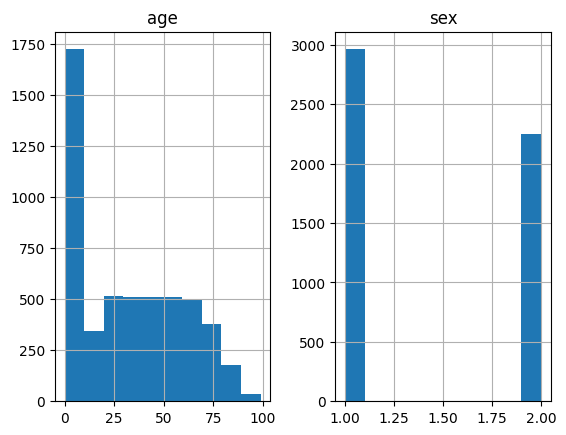

In [15]:
data.drop(['gs_text34'],1).hist()
plt.show()

(Explicacion)

In [16]:
data.describe()

,age,sex
count,5209.000000,5209.000000
mean,31.702197,1.431369
std,27.360152,0.495315
min,0.000000,1.000000
25%,1.000000,1.000000
50%,30.000000,1.000000
75%,55.000000,2.000000
max,99.000000,2.000000


(Explicacion)

<h1>PreProcesamiento</h1>

Vamos a dividir el preprocesamiento en distintos pasos:

1.

2.

3.

4.

5.

6.

<h2>1. Pasar a minusculas el texto</h2>

(Explicacion)
CREO QUE YA ESTABA TODO EN MINUSCULAS

In [17]:
data["open_response"] = data["open_response"].str.lower()
data.head(5)

,module,age,sex,site,open_response,gs_text34
0,Adult,65.0,1,Bohol,date he felt a lower back pain and had fever s...,Diseases of Respiratory System
1,Child,0.0,2,Dar,the caese of death is pneumonia,Diseases of Respiratory System
2,Adult,23.0,2,AP,i took my wife to a private hospital for tubec...,"Pregnancy, childbirth and the puerperiu"
3,Adult,40.0,1,AP,he went to the work on sunday there were # iro...,External Causes of Morbidity and Mortality
4,Adult,55.0,1,UP,the deceased had died due to a snake bite the ...,"Injury, Poisoning and External Causes"


<h2>2. Quitar marcas de puntuacion</h2>

(Explicacion)

In [18]:
def quitar_marcasPuntuacion(text:str):
    return text.translate(str.maketrans('', '', string.punctuation))

In [19]:
print(data["open_response"][45])

my mother suffered from fever continuously for # months she was treated in hospital where the doctor prescribed medicines but fever did not control later she was taken to hospital since the treatment was so expensive in the hospital the doctor advised us to take her to hospital but we did not take her to hospital but took her to hospital and admitted there since stains were present all over the body the doctors were firm to see the test results on the stains to proceed further on treatment by that time they were not specific to name the disease she was dead when the treatment was going on


In [20]:
data["open_response"] = data["open_response"].apply(lambda txt: quitar_marcasPuntuacion(txt))


In [21]:
print(data["open_response"][45])

my mother suffered from fever continuously for  months she was treated in hospital where the doctor prescribed medicines but fever did not control later she was taken to hospital since the treatment was so expensive in the hospital the doctor advised us to take her to hospital but we did not take her to hospital but took her to hospital and admitted there since stains were present all over the body the doctors were firm to see the test results on the stains to proceed further on treatment by that time they were not specific to name the disease she was dead when the treatment was going on


<h2>3. Extender las contracciones</h2>

In [22]:
def extender_contracciones(text):    
    expanded_words = []   
    for word in text.split():
      # using contractions.fix to expand the shortened words
      expanded_words.append(contractions.fix(word))  

    return ' '.join(expanded_words)

In [23]:
cntrtn_text = "I've to go the toilet, I can't wait."
print(cntrtn_text)
print(extender_contracciones(cntrtn_text))

I've to go the toilet, I can't wait.
I have to go the toilet, I cannot wait.


In [24]:
data["open_response"] = data["open_response"].apply(lambda txt: extender_contracciones(txt))

<h2>4. Stemming</h2>

In [81]:
#stemmer = PorterStemmer()

#def stem_palabras(text):
#    return " ".join([stemmer.stem(word) for word in text.split()])

In [82]:
#print(data["open_response"][0])

date he felt a lower back pain and had fever so we went to hospital here in place the doctor was suspecting arthritis he was ordered for x ray so we went to hospital lab results are all normal but suddenly the complained of difficulty in breathing the doctor said that he has pneumonia oxygen inhalation was started and still he was weak and his blood sugar was elevated and he died the ff day


In [83]:
#data["open_response"] = data["open_response"].apply(lambda text: stem_palabras(text))

In [84]:
#print(data["open_response"][0])

date he felt a lower back pain and had fever so we went to hospit here in place the doctor wa suspect arthriti he wa order for x ray so we went to hospit lab result are all normal but suddenli the complain of difficulti in breath the doctor said that he ha pneumonia oxygen inhal wa start and still he wa weak and hi blood sugar wa elev and he die the ff day


<h2>5. Lematizacion</h2>

In [25]:
lemmatizer = WordNetLemmatizer()
nltk.download('wordnet')
nltk.download('omw-1.4')

def lematizar_palabras(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

[nltk_data] Downloading package wordnet to /home/peio/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/peio/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [26]:
print(data["open_response"][0])

date he felt a lower back pain and had fever so we went to hospital here in place the doctor was suspecting arthritis he was ordered for x ray so we went to hospital lab results are all normal but suddenly the complained of difficulty in breathing the doctor said that he has pneumonia oxygen inhalation was started and still he was weak and his blood sugar was elevated and he died the ff day


In [27]:
data["open_response"] = data["open_response"].apply(lambda text: lematizar_palabras(text))

In [28]:
print(data["open_response"][0])

date he felt a lower back pain and had fever so we went to hospital here in place the doctor wa suspecting arthritis he wa ordered for x ray so we went to hospital lab result are all normal but suddenly the complained of difficulty in breathing the doctor said that he ha pneumonia oxygen inhalation wa started and still he wa weak and his blood sugar wa elevated and he died the ff day


<h2>6. Quitar las stopwords</h2>

(Explicacion)

In [29]:
nltk.download('stopwords')
def quitar_stopwords(txt:str):
    return ' '.join([word for word in txt.split(' ') if word not in stopwords.words('english')])

[nltk_data] Downloading package stopwords to /home/peio/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [30]:
print(data["open_response"][1])

the caese of death is pneumonia


In [31]:
data["open_response"] = data["open_response"].apply(lambda txt: quitar_stopwords(txt))


In [32]:
print(data["open_response"][1])

caese death pneumonia


<h2>7. Quitar espacios extra</h2>

In [33]:
def quitar_espaciosExtra(txt:str):
    return re.sub(' +', ' ', txt)

In [34]:
xtrSpc_text = "I've   to  go the toilet,  I can't   wait."
print(xtrSpc_text)
print(quitar_espaciosExtra(xtrSpc_text))

I've   to  go the toilet,  I can't   wait.
I've to go the toilet, I can't wait.


In [35]:
data["open_response"] = data["open_response"].apply(lambda text: quitar_espaciosExtra(text))

k-means eta document embedding, 